# Information


The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours.

Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label.

These features are described in UNSW-NB15_features.csv file.

The total number of records is two million and 540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.

The ground truth table is named UNSW-NB15_GT.csv and the list of event file is called UNSW-NB15_LIST_EVENTS.csv.

A partition from this dataset is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively.

The details of the UNSW-NB15 dataset are published in following the papers:

Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)." Military Communications and Information Systems Conference (MilCIS), 2015. IEEE, 2015.
Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 dataset and the comparison with the KDD99 dataset." Information Security Journal: A Global Perspective (2016): 1-14.
Moustafa, Nour, et al. . "Novel geometric area analysis technique for anomaly detection using trapezoidal area estimation on large-scale networks." IEEE Transactions on Big Data (2017).
Moustafa, Nour, et al. "Big data analytics for intrusion detection system: statistical decision-making using finite dirichlet mixture models." Data Analytics and Decision Support for Cybersecurity. Springer, Cham, 2017. 127-156.
There are some papers published by the authors for developing, Intrusion Detection, Network Forensics, and Privacy-preserving, and threat intelligence approaches in different systems, such as Network Systems, Internet of Things (IoT), SCADA, Industrial IoT, and Industry 4.0.

It is preferable to use and cite these new approaches while comparing your new techniques, as there are different techniques and datasets that could compare with the UNSW-NB15 dataset and our new Bot.

Moustafa, Nour, et al. "An Ensemble Intrusion Detection Technique based on proposed Statistical Flow Features for Protecting Network Traffic of Internet of Things." IEEE Internet of Things Journal (2018).
Koroniotis, Nickolaos, Moustafa, Nour, et al. "Towards Developing Network Forensic Mechanism for Botnet Activities in the IoT Based on Machine Learning Techniques." International Conference on Mobile Networks and Management. Springer, Cham, 2017.
Moustafa, Nour, et al. "Generalized Outlier Gaussian Mixture technique based on Automated Association Features for Simulating and Detecting Web Application Attacks." IEEE Transactions on Sustainable Computing (2018).
Keshk, Marwa, Moustafa, Nour, et al. "Privacy preservation intrusion detection technique for SCADA systems." Military Communications and Information Systems Conference (MilCIS), 2017. IEEE, 2017.
Moustafa, Nour, et al. "A New Threat Intelligence Scheme for Safeguarding Industry 4.0 Systems." IEEE Access (2018).
Moustafa, Nour, et al. "Anomaly Detection System Using Beta Mixture Models and Outlier Detection." Progress in Computing, Analytics and Networking. Springer, Singapore, 2018. 125-135.
Moustafa, Nour, et al. "Flow Aggregator Module for Analysing Network Traffic." Progress in Computing, Analytics and Networking. Springer, Singapore, 2018. 19-29.
Moustafa, Nour, et al. "A Network Forensic Scheme Using Correntropy-Variation for Attack Detection." IFIP International Conference on Digital Forensics. Springer, Cham, 2018.
For more information about designing the new algorithms of the features published in the UNSW-NB15 dataset, please cite Dr.Nour Moustafa’s thesis. The details of the algorithms have been published in Chapter 3.

Moustafa, Nour. Designing an online and reliable statistical anomaly detection framework for dealing with large high-speed network traffic. Diss. University of New South Wales, Canberra, Australia, 2017.
Free use of the UNSW-NB15 dataset for academic research purposes is hereby granted in perpetuity. Use for commercial purposes should be agreed by the authors. Nour Moustafa and Jill Slay have asserted their rights under the Copyright. To whom intend the use of the UNSW-NB15 dataset have to cite the above two papers.

For more information, please contact the authors: Dr. Nour Moustafa and Professor Jill Slay. Dr. Nour is a lecturer in Cybersecurity with SEIT-UNSW Canberra, and he is interested in new Cyber threat intelligence approaches and the technology of Industry 4.0. More information about Dr Nour is provided on his pages:



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv('/content/UNSW_NB15_training-set.csv')

In [34]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [35]:
df.shape

(82332, 45)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [37]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


# EDA

In [38]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

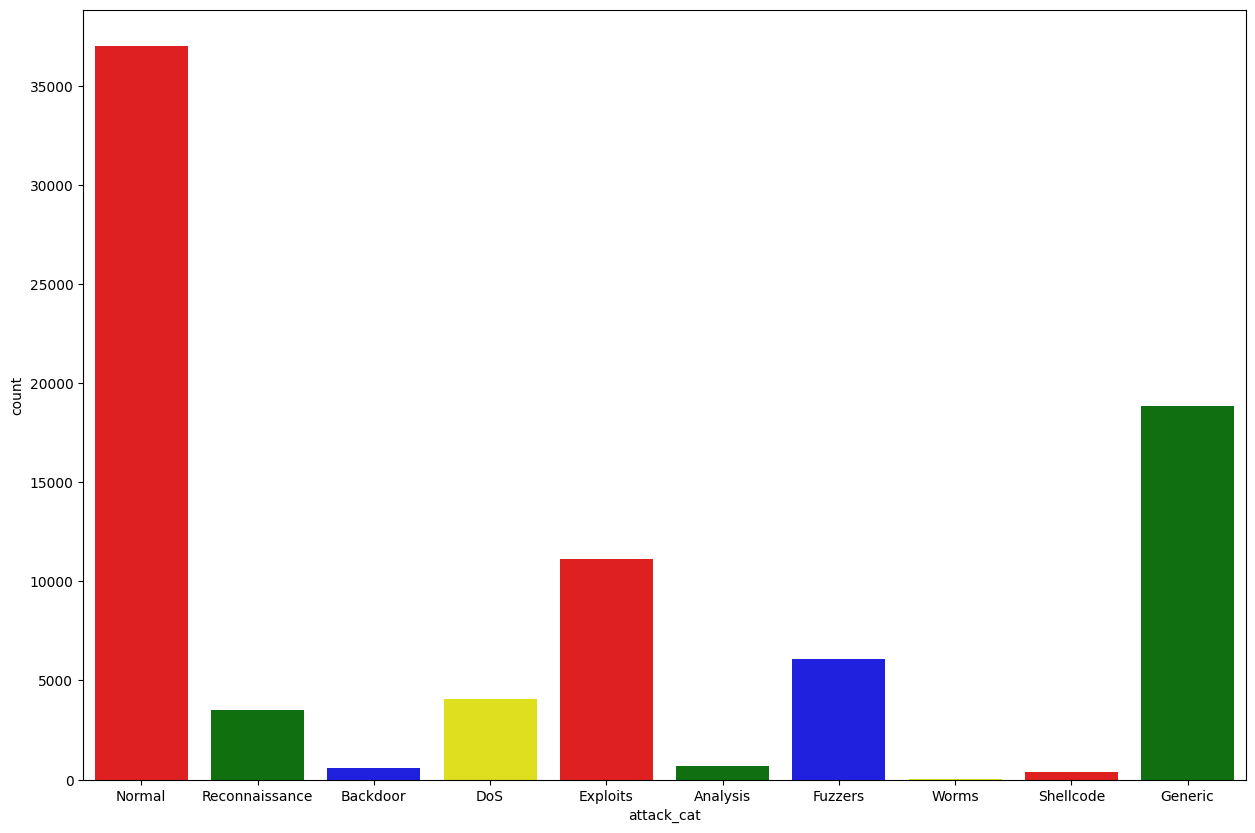

In [39]:
plt.figure(figsize=(15, 10))
custom_palette = ['red', 'green', 'blue', 'yellow']
sns.countplot(x='attack_cat', data=df, palette=custom_palette)
plt.show()

In [40]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [41]:
df.duplicated().sum()

0

In [42]:
column=df.columns
column

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [43]:
for i in column:
  print(f'{i}:{df[i].unique()}')

id:[    1     2     3 ... 82330 82331 82332]
dur:[1.100000e-05 8.000000e-06 5.000000e-06 ... 8.119140e-01 5.167410e+00
 1.106101e+00]
proto:['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'com

In [44]:
df.head(1)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0


# Data Preocessing

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [46]:
categorical= ['proto', 'service', 'state', 'attack_cat']

In [47]:
encoder=LabelEncoder()

In [49]:
for i in categorical:
  df[i+'encoded']=encoder.fit_transform(df[i])

In [58]:
df.drop(['proto', 'service', 'state', 'attack_cat'],axis=1,inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [61]:
X=df.drop(['attack_catencoded'],axis=1)
y=df['attack_catencoded']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
smote=SMOTE()
X_res,y_res=smote.fit_resample(X_train,y_train)

In [66]:
y_res.value_counts()

6    29582
4    29582
5    29582
3    29582
2    29582
1    29582
0    29582
8    29582
7    29582
9    29582
Name: attack_catencoded, dtype: int64

In [68]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
mlc = MLPClassifier()
adc = AdaBoostClassifier()

In [69]:
for model in [lr, dtc, rfc, gnb, knn, gbc, xgb, mlc, adc]:
    print('Model Name  --------------------------------------------', model)

    # Train the model on the scaled training set
    abc = model.fit(X_res, y_res)

    # Predictions on the training set
    Y_pred_train = abc.predict(X_res)

    # Predictions on the original test set
    Y_pred_test = abc.predict(X_test)

    # Accuracy scores
    As_train = accuracy_score(Y_pred_train, y_res)
    As_test = accuracy_score(Y_pred_test, y_test)

    # Confusion matrix and classification report on the original test set
    cm = confusion_matrix(Y_pred_test, y_test)
    cr = classification_report(Y_pred_test, y_test)

    # Print results
    print("training Accuracy score \n", As_train)
    print("=========="*3)
    print("testing Accuracy score \n", As_test)
    print("=========="*3)
    print("Confusion matrix \n", cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n", cr)
    print("=========="*3)

Model Name  -------------------------------------------- LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

training Accuracy score 
 0.17521127712798323
testing Accuracy score 
 0.06066678812169794
Confusion matrix 
 [[ 116   95  575  644  405 3620 1865  347   40    0]
 [   3    9   21   23   17    7  267    7    0    0]
 [   0    0    1    0    0    0    0    0    0    0]
 [   4    2   71  520  268   38 1400  115   15    4]
 [   0    0    0    0    0    0   25    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    5   13    0    0  350    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   8   11  113 1075  522   58 3511  254   20    3]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.89      0.02      0.03      7707
           1       0.08      0.03      0.04       354
           2       0.00      1.00      0.00         1
           3       0.23      0.21      0.22      2437
           4       0.00      0.00      0.00        25
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 0.2514671083767156
testing Accuracy score 
 0.29805064674804155
Confusion matrix 
 [[   0    1    6    0    2    0   10    0    0    0]
 [  77   84   97  179  230 2210  625  149   16    0]
 [  24   14  270  387  112   23  304  108   21    1]
 [  28   15  362 1565  649 1463 3117  435   29    4]
 [   1    1    9    9   49    4   47    2    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    1   14   77   45    5 2938   15    3    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   1    1   28   58  125   18  377   14    6    2]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.72      0.02      0.04      3667
           2       0.34      0.21      0.26      1264
           3       0.69      0.20      0.31      7667
           4       0.04      0.40      0.07       122
           

# Conclusion


Logistic Regression:

Training Accuracy: 0.18
Testing Accuracy: 0.06
Decision Tree Classifier:

Training Accuracy: 0.99
Testing Accuracy: 0.88
Random Forest Classifier:

Training Accuracy: 0.99
Testing Accuracy: 0.90
Gaussian Naive Bayes:

Training Accuracy: 0.26
Testing Accuracy: 0.24
K-Nearest Neighbors:

Training Accuracy: 0.78
Testing Accuracy: 0.60
Gradient Boosting Classifier:

Training Accuracy: 0.79
Testing Accuracy: 0.88
XGBoost Classifier:

Training Accuracy: 0.86
Testing Accuracy: 0.89
Multilayer Perceptron (MLP) Classifier:

Training Accuracy: 0.25
Testing Accuracy: 0.30
AdaBoost Classifier:

Training Accuracy: 0.45
Testing Accuracy: 0.60
Based on the testing accuracy, the XGBoost Classifier appears to be the best-performing model among the ones you've evaluated. It has the highest testing accuracy at 0.89.

However, accuracy is not the only metric to consider, especially when dealing with imbalanced datasets. You may also want to examine other metrics such as precision, recall, and F1-score, especially for specific classes of interest. Additionally, consider whether any of the models are exhibiting overfitting or underfitting.

In conclusion, the XGBoost Classifier seems to be the most promising based on the provided information, but it's always a good idea to explore multiple metrics and potentially fine-tune the model based on your specific goals and requirements.